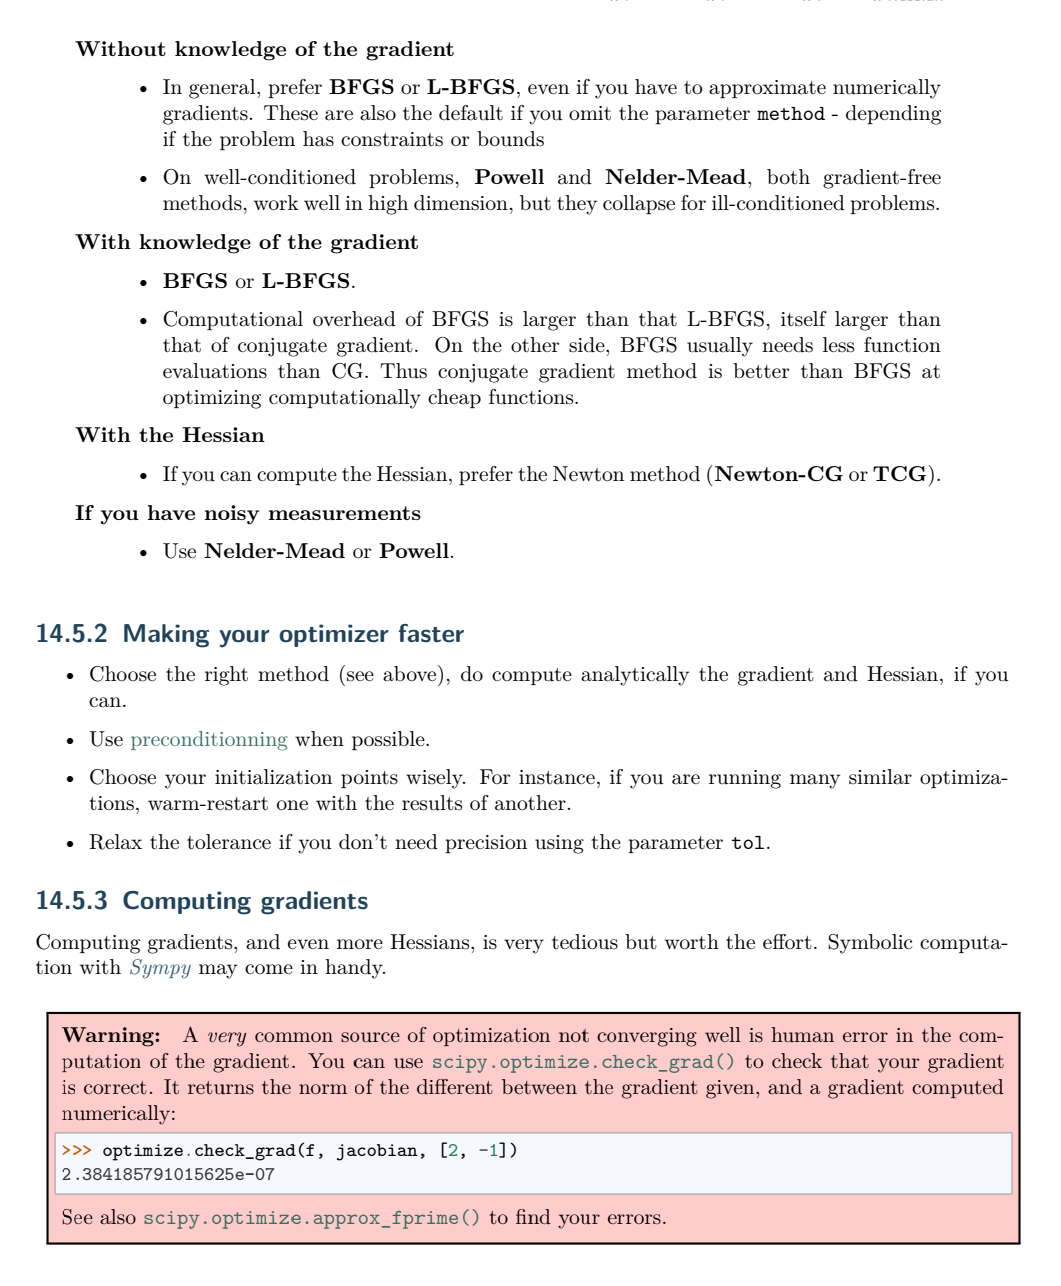

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Brent’s method

<b> Scalar Function </b> : A function f(x_1,...,x_n) of one or more variables whose range is one-dimensional, as compared to a vector function, whose range is three-dimensional (or, in general, n-dimensional).

<b> scipy.optimize.minimize_scalar() uses Brent’s method </b>

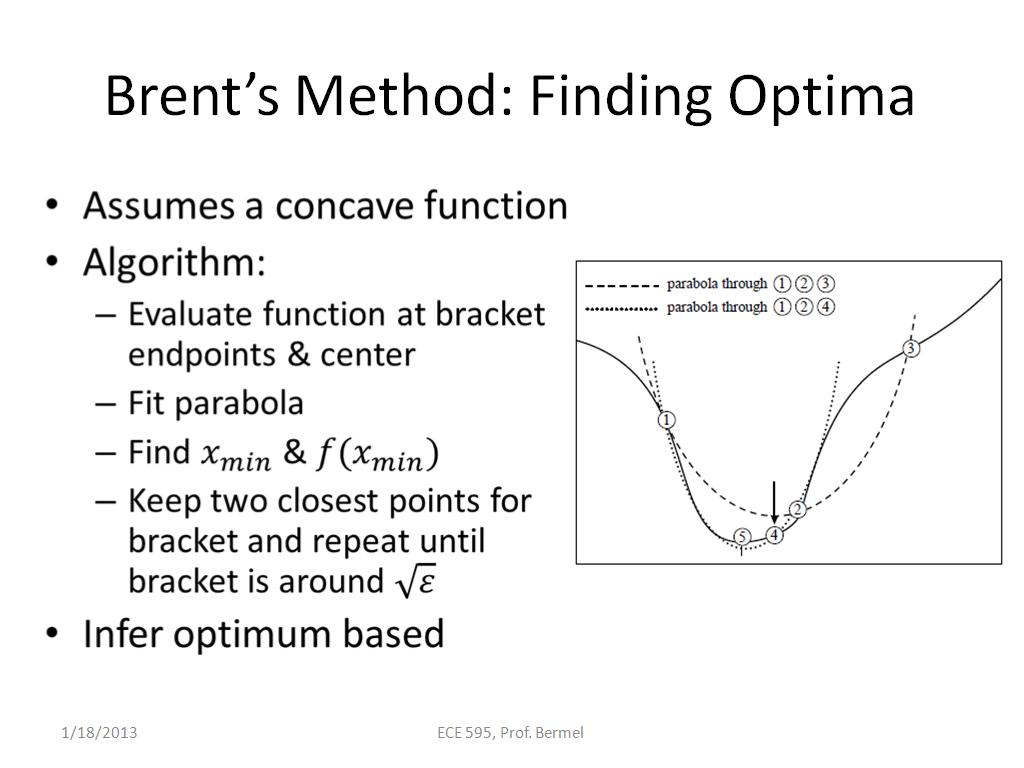

In [9]:
def f(x):
    return -np.exp(-(x - 0.7)**2)

result = optimize.minimize_scalar(f)

print(result.success) # check if solver was successful

x_min = result.x

True


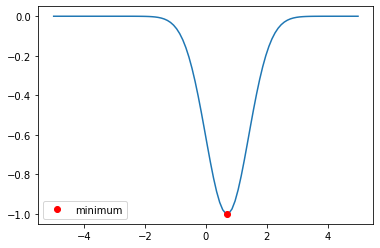

In [11]:
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)
plt.plot(x_min , f(x_min) , 'ro' , label='minimum')
plt.legend()

## Gradient Based Methods

### Conjugate gradient descent

- one of the problems of the simple gradient descent algorithms,
is that it tends to oscillate across a valley, each time following the direction of the gradient, that makes
it cross the valley. The conjugate gradient solves this problem by adding a friction term: each step
depends on the two last values of the gradient and sharp turns are reduced

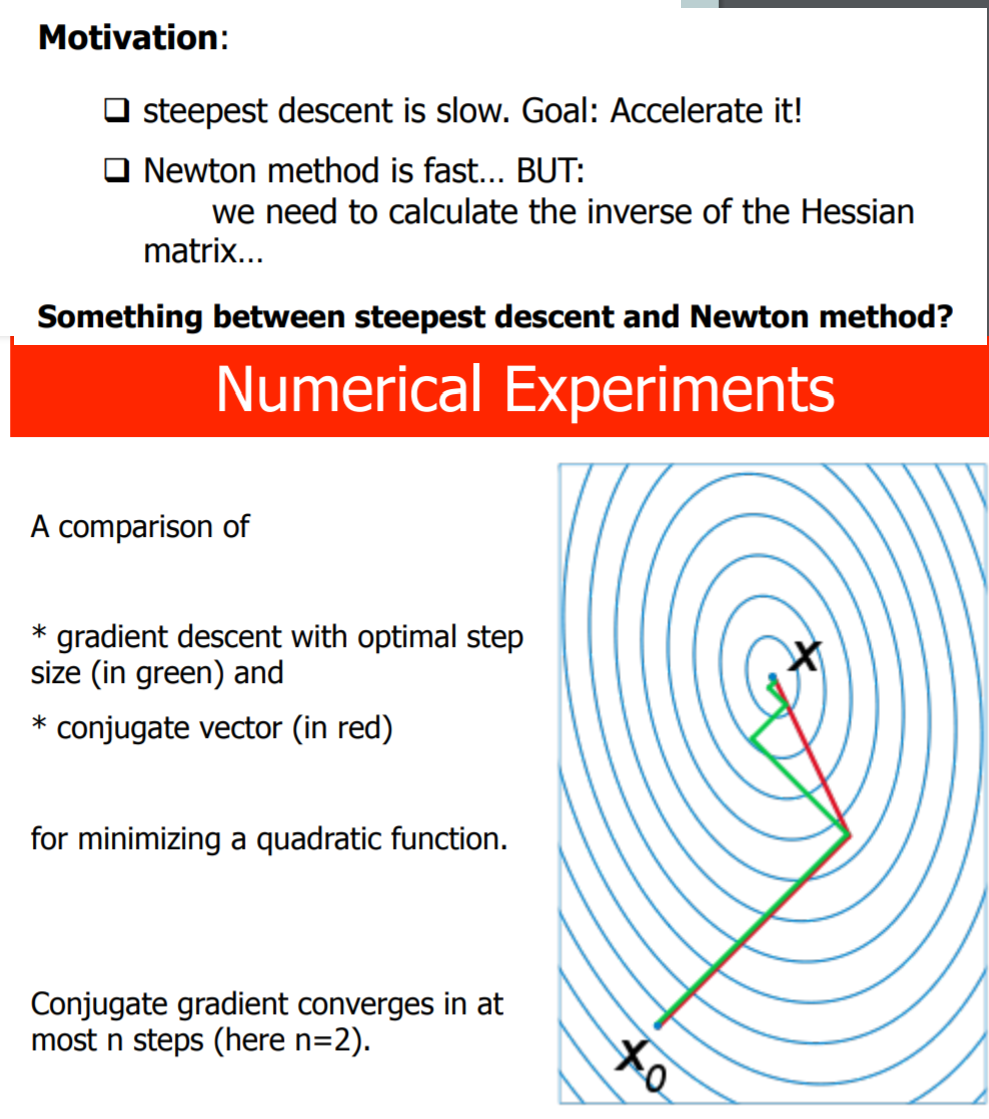

In [4]:
def f(x): # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [5]:
optimize.minimize(f, [2, -1], method="CG")

     fun: 1.6485258037174643e-11
     jac: array([-6.15005779e-06,  2.53702478e-07])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999426, 0.99998864])

- Gradient methods need the Jacobian (gradient) of the function. They can compute it numerically, but
will perform better if you can pass them the gradient:

In [6]:
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [7]:
optimize.minimize(f, [2, 1], method="CG", jac=jacobian)

     fun: 2.957865890641887e-14
     jac: array([ 7.18259502e-07, -2.99030306e-07])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([1.00000012, 1.00000009])

### Newton and quasi-newton methods

#### Newton methods: using the Hessian (2nd differential)

Newton methods use a local quadratic approximation to compute the jump direction. For this purpose,
they rely on the 2 first derivative of the function: the gradient and the Hessian

In [8]:
def f(x): # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian)

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 52
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

Note that compared to a conjugate gradient (above), Newton’s method has required less function evaluations, but more gradient evaluations, as it uses it to approximate the Hessian. Let’s compute the Hessian and pass it to the algorithm:

In [9]:
def hessian(x): # Computed with sympy
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian, hess=hessian)

     fun: 1.6277298383706738e-15
     jac: array([ 1.11044158e-07, -7.78093352e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 10
     nit: 10
    njev: 20
  status: 0
 success: True
       x: array([0.99999994, 0.99999988])

<b> At very high-dimension, the inversion of the Hessian can be costly and unstable (large scale >
250) </b>

#### Quasi-Newton methods: approximating the Hessian on the fly

BFGS: BFGS (Broyden-Fletcher-Goldfarb-Shanno algorithm) refines at each step an approximation of
the Hessian.

## Curve Fitting

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

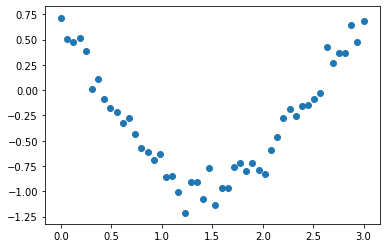

In [13]:

np.random.seed(0)
# Our test function
def f(t, omega, phi):
    return np.cos(omega * t + phi)
# Our x and y data
x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)

plt.scatter(x,y)

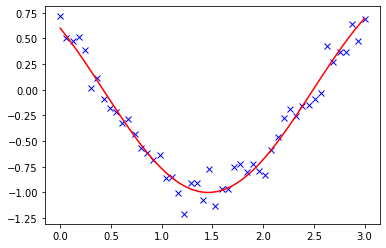

In [20]:
# Fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)
# plot the data and the fitted curve
t = np.linspace(0, 3, 1000)
plt.figure(1)
plt.clf()
plt.plot(x, y, 'bx')
plt.plot(t, f(t, *params), 'r-')
plt.show()

## Powell's method (eg: Finding a minimum in a flat neighborhood)

- An excercise of finding minimum. This excercise is hard because the function is very flat around the
minimum (all its derivatives are zero). Thus gradient information is unreliable.
- The function admits a minimum in [0, 0]. The challenge is to get within 1e-7 of this minimum, starting
at x0 = [1, 1].
- The solution that we adopt here is to give up on using gradient or information based on local differences, and to rely on the Powell algorithm. With 162 function evaluations, we get to 1e-8 of the solution.

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [21]:
def f(x):
    return np.exp(-1/(.01*x[0]**2 + x[1]**2))

# A well-conditionned version of f:
def g(x):
    return f([10*x[0], x[1]])

# The gradient of g. We won't use it here for the optimization.
def g_prime(x):
    r = np.sqrt(x[0]**2 + x[1]**2)
    return 2/r**3*g(x)*x/r

In [22]:
result = optimize.minimize(g, [1, 1], method="Powell", tol=1e-10)
x_min = result.x

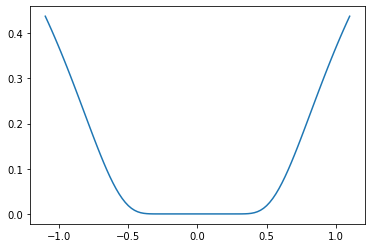

In [23]:
plt.figure(0)
plt.clf()
t = np.linspace(-1.1, 1.1, 100)
plt.plot(t, f([0, t]))

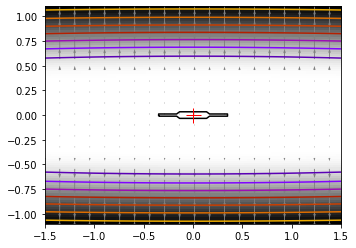

In [24]:
plt.figure(1)
plt.clf()

X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
plt.imshow(f([X, Y]).T, cmap=plt.cm.gray_r, extent=[-1.5, 1.5, -1.1, 1.1],origin='lower')
plt.contour(X, Y, f([X, Y]), cmap=plt.cm.gnuplot)
# Plot the gradient
dX, dY = g_prime([.1*X[::5, ::5], Y[::5, ::5]])
# Adjust for our preconditioning
dX *= .1
plt.quiver(X[::5, ::5], Y[::5, ::5], dX, dY, color='.5')
# Plot our solution
plt.plot(x_min[0], x_min[1], 'r+', markersize=15)
plt.show()

## Optimization with constraints

- Optimization with constraints

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]

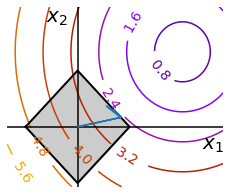

In [29]:
x = x.T
y = y.T
plt.figure(1, figsize=(3, 2.5))
plt.clf()
plt.axes([0, 0, 1, 1])
contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-2.03, 4.2, -1.6, 3.2],
                        cmap=plt.cm.gnuplot)
plt.clabel(contours,
    inline=1,
    fmt='%1.1f ',
    fontsize=14)
plt.plot([-1.5, 0, 1.5, 0, -1.5],
            [ 0, 1.5, 0, -1.5, 0], 'k', linewidth=2)
plt.fill_between([ -1.5, 0, 1.5],
                [ 0, -1.5, 0],
                [ 0, 1.5, 0],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 2.8, '$x_2$', size=20)
plt.text(3.6, -.6, '$x_1$', size=20)
plt.axis('tight')
plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.minimize(f, 
                  np.array([0, 0]),
                  method="SLSQP",
                constraints={"fun": constraint, "type": "ineq"})

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])
plt.show()